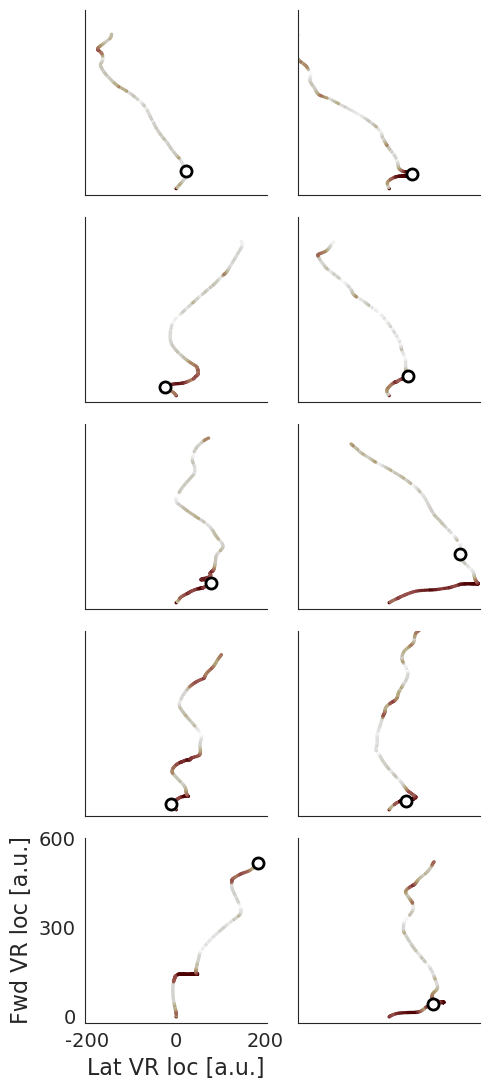

In [179]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cmcrameri as cmc
import reaction_time as reac
import pandas as pd

cols_macaque = sns.color_palette(np.array(['#7695B8','#68c3ffff', "#3171eb", "#3e4752ff"]))
cols_mouse = sns.color_palette(np.array(["#5E3C18", "#F5993D", "#A8612A"]))

# Define the animal
animal = 'mouse'
newSamp = 60
# Load log, flash, face, and eye files
with open('RawData/Mouse/files_logs_mouse_moreSes.txt') as f:
    files_logs = [line.strip() for line in f.readlines()]

sess_data = reac.sess_data_maker(files_logs[1], animal, 3000)
r_time, _ = reac.reaction_time(sess_data, [5,10,15])
r_time[pd.isna(r_time)] = -1
r_time = r_time.astype(np.float64)
r_time = r_time / newSamp
r_time[r_time > 4] = 4

fig, ax = plt.subplots(ncols = 2, nrows = 5, figsize=(5,11))
st = 10
for i in range(st, st+10):
    rt = int(r_time[i]*60)
    axi = ax.flat[i-st]
    axi.scatter(sess_data[i,1], sess_data[i,0], marker = 'o', s = 2, c = np.hstack([0, np.diff(sess_data[i,0])]), alpha = 1, cmap = 'cmc.bilbao_r')
    axi.plot([sess_data[i,1][rt]],[sess_data[i,0][rt]], "black",marker = 'o', mfc = 'white', mew = 2, alpha = 1, ms = 8)
    axi.set_xticks([])
    axi.set_yticks([])
    axi.set_xlim([-205, 205])
    axi.set_ylim([-20, 600])
    if i == st+8:
        axi.set_xlabel("Lat VR loc [a.u.]", fontsize = 16)
        axi.set_ylabel("Fwd VR loc [a.u.]", fontsize = 16)
        axi.set_yticks(np.linspace(0, 600, 3), np.linspace(0, 600, 3).astype(int), fontsize = 14)
        axi.set_xticks(np.linspace(-200, 200, 3), np.linspace(-200, 200, 3).astype(int), fontsize = 14)

sns.despine()
plt.tight_layout()

/tmp/ipykernel_351728/2169183564.py:57: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


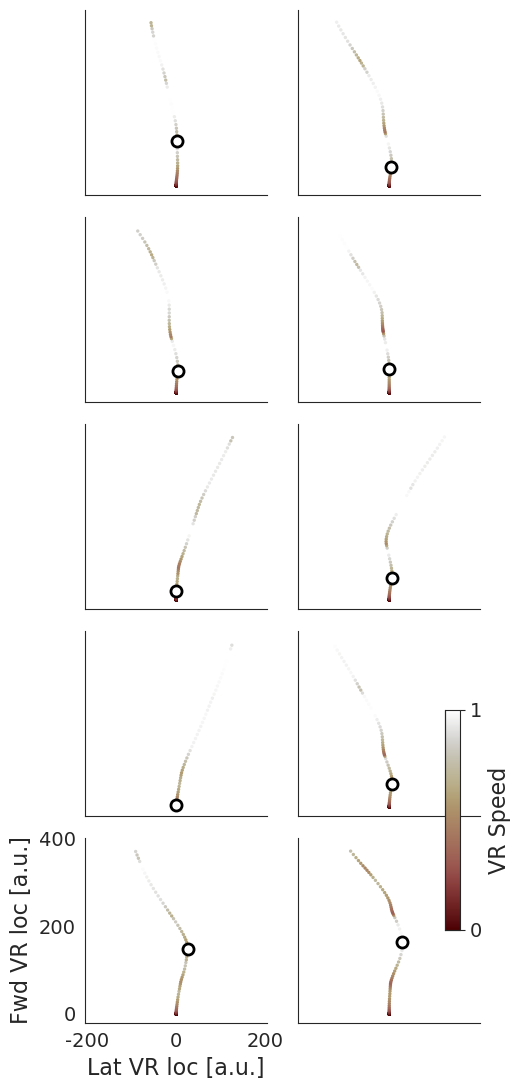

In [190]:
# Import necessary libraries
from matplotlib.colors import Normalize
from matplotlib.colorbar import ColorbarBase

# Define the animal
animal = 'macaque'

# Load log, flash, face, and eye files
with open('RawData/Macaque/files_logs_macaque_moreSes.txt') as f:
    files_logs = [line.strip() for line in f.readlines()]

sess_data = reac.sess_data_maker(files_logs[1], animal, 3000)
r_time, _ = reac.reaction_time(sess_data, [5,10,15])
r_time[pd.isna(r_time)] = -1
r_time = r_time.astype(np.float64)
r_time = r_time / newSamp
r_time[r_time > 4] = 4


fig, ax = plt.subplots(ncols = 2, nrows = 5, figsize=(5,11))
st = 10
cmap = plt.get_cmap('cmc.bilbao_r') # Get the colormap

for i in range(st, st+10):
    rt = int(r_time[i]*60)
    axi = ax.flat[i-st]
    axi.scatter(sess_data[i,1], sess_data[i,0], marker = 'o', s = 2, c = np.hstack([0, np.diff(sess_data[i,0])]), alpha = 1, cmap = cmap)
    axi.plot([sess_data[i,1][rt]],[sess_data[i,0][rt]], "black",marker = 'o', mfc = 'white', mew = 2, alpha = 1, ms = 8)
    axi.set_xticks([])
    axi.set_yticks([])
    axi.set_xlim([-205, 205])
    axi.set_ylim([-20, 400])
    if i == st+8:
        axi.set_xlabel("Lat VR loc [a.u.]", fontsize = 16)
        axi.set_ylabel("Fwd VR loc [a.u.]", fontsize = 16)
        axi.set_yticks(np.linspace(0, 400, 3), np.linspace(0, 400, 3).astype(int), fontsize = 14)
        axi.set_xticks(np.linspace(-200, 200, 3), np.linspace(-200, 200, 3).astype(int), fontsize = 14)

# Create an axes for the colorbar
cbar_ax = fig.add_axes([0.9, 0.15, 0.03, 0.2]) # adjust the size and position as needed
norm = Normalize(vmin=0, vmax=1)
cb = ColorbarBase(cbar_ax, cmap=cmap, norm=norm, orientation='vertical')
cb.set_label('VR Speed', fontsize = 16)
cb.set_ticks([0, 1])
cb.set_ticklabels(['0', '1'], fontsize = 14)
sns.despine()
plt.tight_layout()

In [12]:
import numpy as np
dats_train = np.load('Predictors_emissions_macaque_concat_train_10pad.npz', allow_pickle = True)
dats_train_mouse = np.load('RawData/Mouse/Predictors_emissions_mouse_TwoAnimals_concat_train_20pad.npz', allow_pickle = True)
dat_train_mouse = dats_train_mouse['predictors']

dat_train_macaque = dats_train['predictors']

dat_train_macaque = dat_train_macaque[:int(dat_train_mouse.shape[0]),:]
y_train_macaque = dats_train['emissions']
y_train_macaque = y_train_macaque[:int(dat_train_mouse.shape[0])].reshape(-1,1)

np.savez('RawData/Macaque/Predictors_emissions_macaque_FeatureMatching_concat_train_10pad.npz', emissions = y_train_macaque, predictors = dat_train_macaque)

In [23]:
# Import necessary libraries
import numpy as np
from parse_logfile_newest import TextLog
import seaborn as sns
import BehavUtils as butils
import reaction_time as reac
import matplotlib.pyplot as plt

# Define the animal
animal = 'macaque'

# Load log, flash, face, and eye files
with open('RawData/Macaque/files_logs_macaque_moreSes.txt') as f:
    files_logs = [line.strip() for line in f.readlines()]
evt, newSamp, nPoints, t_final, idx_start, idx_stim, _ = butils.readLog(files_logs[0], animal)
sess_data = reac.sess_data_maker(files_logs[0], animal, 3000)
r_time, _ = reac.reaction_time(sess_data, [5,10,15])
r_time[pd.isna(r_time)] = -1
r_time = r_time.astype(np.float64)
r_time = r_time / newSamp
r_time[r_time > 4] = 4

Had to increase array size
N frames missed: 24
Increased all_ids size
AnimalCharacter_C_2147482442
Had to increase array size
N frames missed: 24
Increased all_ids size


/gs/home/tlaieboriaa/.conda/envs/Cluster-GLMHMM3/lib/python3.9/site-packages/numpy/core/shape_base.py:121: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


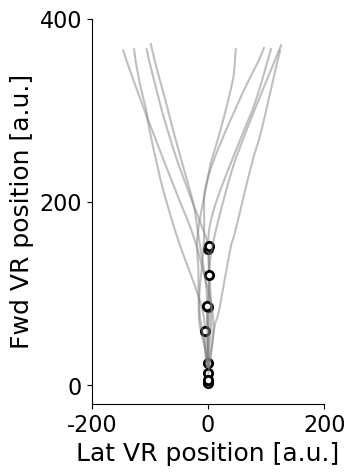

In [26]:
plt.figure(figsize=(3,5))
for i in range(10):
    rt = int(r_time[i]*60)
    plt.plot(sess_data[i,1],sess_data[i,0],"gray", alpha = 0.5)
    plt.plot([sess_data[i,1][rt]],[sess_data[i,0][rt]], "black",marker = 'o', mfc = 'white', mew = 2, alpha = 1)
plt.xlim([-200, 200])
plt.ylim([-20, 400])
plt.xlabel("Lat VR position [a.u.]", fontsize = 18)
plt.ylabel("Fwd VR position [a.u.]", fontsize = 18)
plt.yticks(np.linspace(0, 400, 3), np.linspace(0, 400, 3).astype(int), fontsize = 16)
plt.xticks(np.linspace(-200, 200, 3), np.linspace(-200, 200, 3).astype(int), fontsize = 16)
sns.despine()

plt.savefig("Paths_Examples_macaque_23062023.svg")

In [ ]:
# Import necessary libraries
import numpy as np
import seaborn as sns
import reaction_time as reac

# Define the animal
animal = 'macaque'

# Load log, flash, face, and eye files
with open('RawData/Macaque/files_logs_macaque_moreSes.txt') as f:
    files_logs = [line.strip() for line in f.readlines()]
r_time_macaque = []
for rr in range(len(files_logs)):
    sess_data = reac.sess_data_maker(files_logs[rr], animal, 3000)
    r_time, _ = reac.reaction_time(sess_data, [5,10,15])
    r_time[pd.isna(r_time)] = -1
    r_time = r_time.astype(np.float64)
    r_time = r_time / newSamp
    r_time[r_time > 4] = 4

    r_time_macaque.append(r_time)
    
    
# Define the animal
animal = 'mouse'

# Load log, flash, face, and eye files
with open('RawData/Mouse/files_logs_mouse_moreSes.txt') as f:
    files_logs = [line.strip() for line in f.readlines()]
r_time_mouse = []
for rr in range(len(files_logs)):
    sess_data = reac.sess_data_maker(files_logs[rr], animal, 3000)
    r_time, _ = reac.reaction_time(sess_data, [5,10,15])
    r_time[pd.isna(r_time)] = -1
    r_time = r_time.astype(np.float64)
    r_time = r_time / newSamp
    r_time[r_time > 4] = 4

    r_time_mouse.append(r_time)

In [81]:
from parse_logfile_newest import TextLog

# Load log, flash, face, and eye files
with open('RawData/Macaque/files_logs_macaque_moreSes.txt') as f:
    files_logs = [line.strip() for line in f.readlines()]
decisionss_macaque = []
for rr in range(len(files_logs)):
    with TextLog(files_logs[rr]) as log:
        evt, ts, evt_desc, true_ts = log.parse_eventmarkers()

    screenTimes = log.log_to_screen_times[:,1]
    logTimes = log.log_to_screen_times[:,0]
    newSamp = (1/np.nanmedian(np.diff(screenTimes)))

    start = screenTimes[0]
    end = screenTimes[-1]
    nPoints = int(np.abs(start - end)*newSamp)
    t_master = np.linspace(start,  end, nPoints)

    idx_start = np.searchsorted(t_master, true_ts[evt == 3000])
    idx_hit = np.searchsorted(t_master, true_ts[evt == 1])
    idx_wrong = np.searchsorted(t_master, true_ts[evt == 2])
    idx_err = np.searchsorted(t_master, true_ts[(evt > 113) * (evt < 118)])
    idx_exit = np.searchsorted(t_master, true_ts[(evt == 3063)])

    decision = butils.decTimetoTrials(t_master, t_master[idx_start], t_master[idx_hit], t_master[idx_wrong], t_master[idx_err], t_master[idx_exit])
    decision[decision == 0] = 3
    
    if decision.shape[0] > r_time_macaque[rr].shape[0]:
        decision = decision[:-1]
    decisionss_macaque.append(decision)
    
# Load log, flash, face, and eye files
with open('RawData/Mouse/files_logs_mouse_moreSes.txt') as f:
    files_logs = [line.strip() for line in f.readlines()]
decisionss_mouse = []
for rr in range(len(files_logs)):
    with TextLog(files_logs[rr]) as log:
        evt, ts, evt_desc, true_ts = log.parse_eventmarkers()

    screenTimes = log.log_to_screen_times[:,1]
    logTimes = log.log_to_screen_times[:,0]
    newSamp = (1/np.nanmedian(np.diff(screenTimes)))
    counter1 = 0
    start = screenTimes[0]
    end = screenTimes[-1]
    nPoints = int(np.abs(start - end)*newSamp)
    t_master = np.linspace(start,  end, nPoints)

    idx_start = np.searchsorted(t_master, true_ts[evt == 3000])
    idx_hit = np.searchsorted(t_master, true_ts[evt == 1])
    idx_wrong = np.searchsorted(t_master, true_ts[evt == 2])
    idx_err = np.searchsorted(t_master, true_ts[(evt > 113) * (evt < 118)])
    idx_exit = np.searchsorted(t_master, true_ts[(evt == 3063)])

    decision = butils.decTimetoTrials(t_master, t_master[idx_start], t_master[idx_hit], t_master[idx_wrong], t_master[idx_err], t_master[idx_exit])
    decision[decision == 0] = 3
    if decision.shape[0] > r_time_mouse[rr].shape[0]:
        decision = decision[:-1]
    decisionss_mouse.append(decision)

Had to increase array size
N frames missed: 24
Had to increase array size
N frames missed: 23
Had to increase array size
Had to increase array size
N frames missed: 26
N frames missed: 873
N frames missed: 311
N frames missed: 495
N frames missed: 826
N frames missed: 301
N frames missed: 632
N frames missed: 902
Had to increase array size
N frames missed: 1670
Had to increase array size
N frames missed: 2760
Had to increase array size
N frames missed: 736
N frames missed: 845
Had to increase array size
N frames missed: 898
N frames missed: 770
Had to increase array size
N frames missed: 880
Had to increase array size
N frames missed: 926
N frames missed: 22
GFrameNumber does not match first PresentCount, automatically adjusting
N frames missed: 34
N frames missed: 20
N frames missed: 23
N frames missed: 25
N frames missed: 43
N frames missed: 24
N frames missed: 23
N frames missed: 10
N frames missed: 14
N frames missed: 2
N frames missed: 13
N frames missed: 24
N frames missed: 5
N f

In [107]:
# define the colors for each outcome
cols_outc = ['#308046', '#964141', '#967d41']

# split reaction times by outcome for macaques
rt_macaque_hit, rt_macaque_miss, rt_macaque_wrong  = [], [], []
for i in range(len(r_time_macaque)):
    rt_macaque_hit.append(r_time_macaque[i][decisionss_macaque[i] == 1])
    rt_macaque_wrong.append(r_time_macaque[i][decisionss_macaque[i] == 2])
    rt_macaque_miss.append(r_time_macaque[i][decisionss_macaque[i] == 3])


# split reaction times by outcome for mice
rt_mouse_hit, rt_mouse_miss, rt_mouse_wrong  = [], [], []
for i in range(len(r_time_mouse)):
    rt_mouse_hit.append(r_time_mouse[i][decisionss_mouse[i] == 1].ravel())
    rt_mouse_wrong.append(r_time_mouse[i][decisionss_mouse[i] == 2])
    rt_mouse_miss.append(r_time_mouse[i][decisionss_mouse[i] == 3])


def flatten_list(l):
    for i in l:
        if isinstance(i, list):
            yield from flatten_list(i)
        elif isinstance(i, np.ndarray):
            yield from i.ravel()
        else:
            yield i

            
rt_mouse_hit = np.array(list(flatten_list(rt_mouse_hit))).ravel()
rt_mouse_hit[rt_mouse_hits<0.05] = np.nan
rt_mouse_wrong = np.array(list(flatten_list(rt_mouse_wrong))).ravel()
rt_mouse_wrong[rt_mouse_wrong<0.05] = np.nan
rt_mouse_miss = np.array(list(flatten_list(rt_mouse_miss))).ravel()
rt_mouse_miss[rt_mouse_miss<0.05] = np.nan

rt_macaque_hit = np.array(list(flatten_list(rt_macaque_hit))).ravel()
rt_macaque_hit[rt_macaque_hit<0.05] = np.nan
rt_macaque_wrong = np.array(list(flatten_list(rt_macaque_wrong))).ravel()
rt_macaque_wrong[rt_macaque_wrong<0.05] = np.nan
rt_macaque_miss = np.array(list(flatten_list(rt_macaque_miss))).ravel()
rt_macaque_miss[rt_macaque_miss<0.05] = np.nan


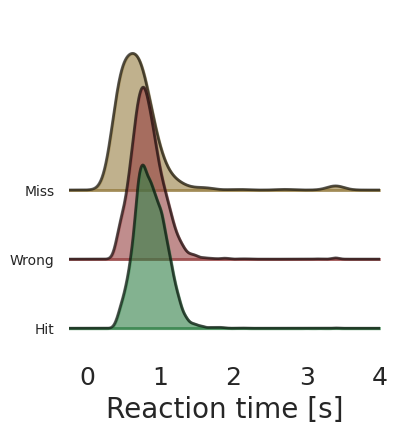

In [134]:
import joypy
import pandas as pd

colors2 = ['black', sns.desaturate("#E0655D", 0.5), sns.desaturate('#45A16A', 0.5)]# Set your custom color palette

vals1 = np.array(rt_macaque_miss[~np.isnan(rt_macaque_miss)], dtype = np.float32)
dftry = pd.DataFrame(vals1, columns = ['Miss'])

vals2 = np.array(rt_macaque_wrong[~np.isnan(rt_macaque_wrong)], dtype = np.float32)
dftry = pd.concat([dftry, pd.DataFrame(vals2, columns = ['Wrong'])])

vals3 = np.array(rt_macaque_hit[~np.isnan(rt_macaque_hit)], dtype = np.float32)
dftry = pd.concat([dftry, pd.DataFrame(vals3, columns = ['Hit'])])

fig, axes = joypy.joyplot(dftry, color = cols_outc[::-1], alpha = 0.6, figsize = (4,4), overlap = 2, lw = 2)

plt.xlabel('Reaction time [s]', fontsize = 20)
plt.xlim([-0.25, 4])
plt.xticks(np.arange(5), np.arange(5), fontsize = 18)

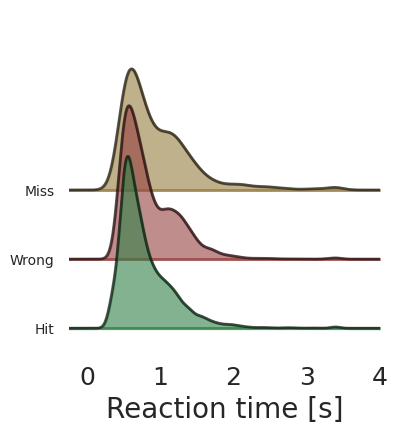

In [135]:
import joypy
colors2 = ['black', sns.desaturate("#E0655D", 0.5), sns.desaturate('#45A16A', 0.5)]# Set your custom color palette

vals1 = np.array(rt_mouse_miss[~np.isnan(rt_mouse_miss)], dtype = np.float32)
dftry = pd.DataFrame(vals1, columns = ['Miss'])

vals2 = np.array(rt_mouse_wrong[~np.isnan(rt_mouse_wrong)], dtype = np.float32)
dftry = pd.concat([dftry, pd.DataFrame(vals2, columns = ['Wrong'])])

vals3 = np.array(rt_mouse_hit[~np.isnan(rt_mouse_hit)], dtype = np.float32)
dftry = pd.concat([dftry, pd.DataFrame(vals3, columns = ['Hit'])])

fig, axes = joypy.joyplot(dftry, color = cols_outc[::-1], alpha = 0.6, figsize = (4,4), overlap = 2, lw = 2)

plt.xlabel('Reaction time [s]', fontsize = 20)
plt.xlim([-0.25, 4])
plt.xticks(np.arange(5), np.arange(5), fontsize = 18)

In [5]:
import glob
import numpy as np
from natsort import natsorted
import seaborn as sns
import matplotlib.pyplot as plt
import matplotx as mpx

files_results_macaque_fullModel = natsorted(glob.glob('Results/Macaque/Results_CV_sLDS_Optuna_macaque_100trials_*_states_28112023_RT_noLEyeBrModel_AllSubjects_R2score_CVOnly.npz', recursive = True))
cv_scores_macaque_fullModel = np.zeros((len(files_results_macaque_fullModel), 100))

for ii, file in enumerate(files_results_macaque_fullModel):
    a = np.load(file, allow_pickle = True)
    cv_scores_macaque_fullModel[ii, :] =  a[a.files[0]][()].copy()

#files_results_mouse_fullModel_old = natsorted(glob.glob('Results/Mouse/Results_CV_sLDS_Optuna_mouse_100trials_*_states_28112023_RT_noEyeMovModel_AllSubjects_R2score_CVOnly.npz', recursive = True))
files_results_mouse_fullModel = natsorted(glob.glob('Results/Mouse/Results_CV_MSLR_Optuna_mouse_newDLC_100trials_*_states_24022024_RT_AllSubjects_R2score_CVOnly.npz', recursive = True))

cv_scores_mouse_fullModel = np.zeros((len(files_results_mouse_fullModel), 100))
for ii, file in enumerate(files_results_mouse_fullModel):
    a = np.load(file, allow_pickle = True)
    keyss = list(a.keys())
    cv_scores_mouse_fullModel[ii, :] =  a[a.files[0]][()].copy()
cv_scores_mouse_fullModel[cv_scores_mouse_fullModel<-100] = 0

cv_lr_macaque =  np.load('LassoReg_macaque_03062023_RT_AllSubjects_R2score_CVOnly.npy')
cv_lr_mouse =  np.load('LassoReg_mouse_03062023_RT_AllSubjects_R2score_CVOnly.npy')

In [2]:
def darken_color(color, amount=0.5):
    import matplotlib.colors as mc
    import colorsys
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], max(0, min(1, amount * c[1])), c[2])


def plot_cv_states(scores_macaque, scores_mouse, ax, colors, marker, saveFig = False, figName = 'Results/mockTitle.png'):
    import seaborn as sns
    import matplotlib.pyplot as plt
    import matplotx as mpx

    meds_macaque = np.nanmax(scores_macaque,axis = 1)
    meds_mouse = np.nanmax(scores_mouse,axis = 1)
    
    # Calculate standard deviations
    std_low_macaque = np.nanpercentile(scores_macaque, 5, axis=1)
    std_low_mouse = np.nanpercentile(scores_mouse, 5, axis=1)

    meds = [meds_macaque, meds_mouse]
    std_low = [std_low_macaque, std_low_mouse]
    # Plot medians and stds
    for ii, axi in enumerate(ax.flat):

        x = np.arange(meds[ii].shape[0])+2
        axi.plot(x, meds[ii], color=darken_color(colors[ii], 0.7), mfc=colors[ii], ms=8, mew=1, marker = marker)
        axi.fill_between(x, std_low[ii], meds[ii], color=colors[ii], alpha = 0.5)
        axi.set_ylim([0, 1])
        axi.set_ylabel('$R^2$ (Cross-Val)', fontsize=16)
        axi.set_xlabel('# internal states', fontsize=16)

        xtiks = np.arange(2, meds[ii].shape[0] + 2)[::2]
        axi.set_xticks(xtiks)
        axi.set_xticklabels(xtiks, fontsize=14)
        axi.set_yticks(np.linspace(0, 1, 3), np.linspace(0, 1, 3), fontsize = 14)
        axi.set_xlim([1.5, meds[ii].shape[0]+1.5])
    plt.tight_layout()
    if saveFig:
        plt.savefig(figName, transparent = True)

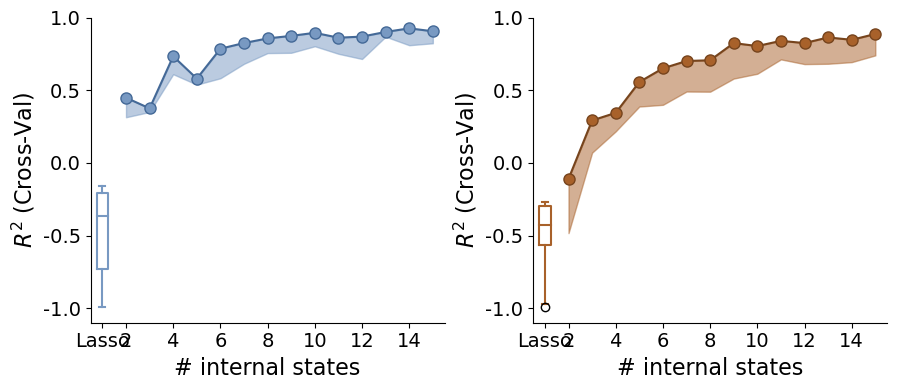

In [7]:
fig, ax = plt.subplots(ncols=2, figsize=(9, 4))
sns.despine()
colors = ['#7899c2ff', '#A8612A']
#plot_cv_states(cv_scores_macaque_fullModel, cv_scores_mouse_fullModel_old, ax, colors = ['gray']*2, marker = 'o')
plot_cv_states(cv_scores_macaque_fullModel, cv_scores_mouse_fullModel, ax, colors = colors, marker = 'o')

for (ii, axi), scors in zip(enumerate(ax.flat), [cv_lr_macaque, cv_lr_mouse]):
    box = axi.boxplot(scors, positions = [1], widths = 0.5)
    for element in ['boxes', 'whiskers', 'caps', 'medians']:
        plt.setp(box[element], color=colors[ii])
        plt.setp(box[element], lw=1.5)

for axi in ax:
    axi.set_ylim(-1.1, 1)
    axi.set_xlim(0.5, 15.5)
    xtiks = np.concatenate([[1], np.arange(2, cv_scores_macaque_fullModel.shape[0] + 2)[::2]])
    axi.set_xticks(xtiks)
    axi.set_yticks(np.linspace(-1,1,5), np.linspace(-1,1,5))
    axi.set_xticklabels(np.concatenate([['Lasso'], np.arange(2, cv_scores_macaque_fullModel.shape[0] + 2)[::2]]), fontsize=14)
plt.savefig('Results/BothSpecies_AllSubjects_numStates_R2_CV_RT_27022024.svg', transparent = True)

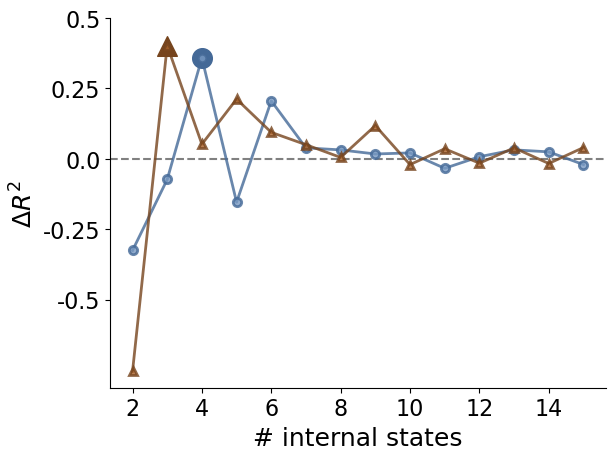

In [9]:
max_scores_macaque = np.max(cv_scores_macaque_fullModel,axis = 1)
max_scores_mouse = np.max(cv_scores_mouse_fullModel,axis = 1)
states = np.arange(2,16)
states_mouse = np.arange(2,16)

diffs_macaque = np.diff(max_scores_macaque, prepend = np.nanmean(max_scores_macaque))
diffs_mouse = np.diff(max_scores_mouse, prepend = np.nanmean(max_scores_mouse))
plt.plot(states, diffs_macaque, color = darken_color(colors[0], 0.7), lw = 2, marker = 'o', mfc = colors[0], mew = 2, alpha = 0.8)
plt.scatter(x = [states[np.argmax(diffs_macaque)]], y = [diffs_macaque[np.argmax(diffs_macaque)]], 
            color = darken_color(colors[0], 0.7), s = 200)
plt.plot(states_mouse, diffs_mouse, color = darken_color(colors[1], 0.7), lw = 2, marker = '^', mfc = colors[1], mew = 2, alpha = 0.8)
plt.scatter(x = [states_mouse[np.argmax(diffs_mouse)]], y = [diffs_mouse[np.argmax(diffs_mouse)]], 
            color = darken_color(colors[1], 0.7), s = 200, marker = '^')
plt.axhline(0, ls = '--', color = 'gray', zorder = -1)
sns.despine()
plt.ylabel(r'$\Delta R^2$', fontsize = 18)
plt.xticks(states[::2], states[::2], fontsize = 16)
plt.yticks(np.linspace(-0.5, 0.5, 5), np.linspace(-0.5, 0.5, 5).astype(np.float16), fontsize = 16)
plt.xlabel('# internal states', fontsize = 18)
plt.savefig('Results/Derivative_CVR2_NumStates_27022024.pdf', transparent = True)

In [86]:
import glob
import numpy as np
from natsort import natsorted
import seaborn as sns
import matplotlib.pyplot as plt
import matplotx as mpx

files_results_macaque_ARHMM = natsorted(glob.glob('ARHMM_CVscores_macaque_*06112023.npy', recursive = True))
cv_scores_macaque_ARHMM = np.zeros((len(files_results_macaque_ARHMM), 50))
for ii, file in enumerate(files_results_macaque_ARHMM):
    cv_scores_macaque_ARHMM[ii,:] = np.load(file)

files_results_mouse_ARHMM = natsorted(glob.glob('ARHMM_CVscores_mouse_*06112023.npy', recursive = True))
cv_scores_mouse_ARHMM = np.zeros((len(files_results_mouse_ARHMM), 50))
for ii, file in enumerate(files_results_mouse_ARHMM):
    cv_scores_mouse_ARHMM[ii,:] = np.load(file)


files_results_macaque = natsorted(glob.glob('Results/Macaque/Results_CV_sLDS_Optuna_macaque_100trials_*_states_28112023_RT_noLEyeBrModel_AllSubjects_R2score_CVOnly.npz', recursive = True))
cv_scores_macaque_fullModel = np.zeros((len(files_results_macaque), 100))
for ii, file in enumerate(files_results_macaque):
    a = np.load(file, allow_pickle = True)
    cv_scores_macaque_fullModel[ii, :] =  a[a.files[0]][()].copy()

files_results_mouse = natsorted(glob.glob('Results/Mouse/Results_CV_sLDS_Optuna_mouse_100trials_*_states_28112023_RT_noEyeMovModel_AllSubjects_R2score_CVOnly.npz', recursive = True))
cv_scores_mouse_fullModel = np.zeros((len(files_results_mouse), 100))
for ii, file in enumerate(files_results_mouse):
    a = np.load(file, allow_pickle = True)
    keyss = list(a.keys())
    cv_scores_mouse_fullModel[ii, :] =  a[a.files[0]][()].copy()

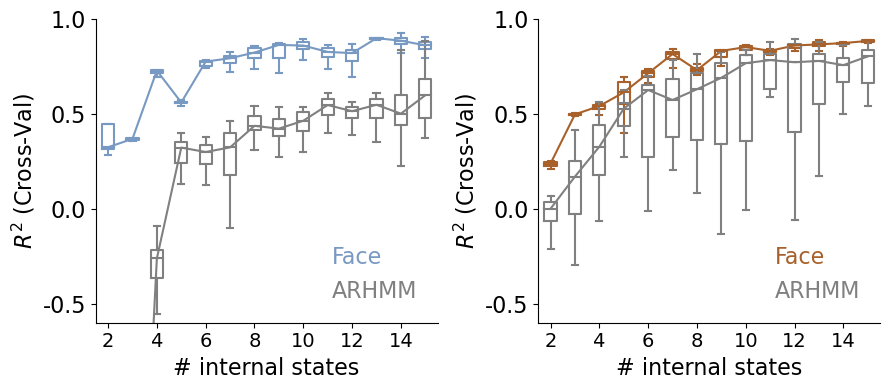

In [87]:
fig, ax = plt.subplots(ncols=2, figsize=(9, 4))
sns.despine()
colors = ['#7899c2ff', '#A8612A']
xlocs = np.arange(2, cv_scores_macaque_fullModel.shape[0]+2)
plot_test_performance(cv_scores_macaque_fullModel.T, xlocs, colors[0], ax[0])
ax[0].plot(xlocs, np.nanmedian(cv_scores_macaque_fullModel, axis = 1), label = 'Face', color = colors[0])
plot_test_performance(cv_scores_macaque_ARHMM.T, xlocs, 'gray', ax[0])
ax[0].plot(xlocs, np.nanmedian(cv_scores_macaque_ARHMM, axis = 1), label = 'ARHMM', color = 'gray')
plot_test_performance(cv_scores_mouse_fullModel.T, xlocs, colors[1], ax[1])
ax[1].plot(xlocs, np.nanmedian(cv_scores_mouse_fullModel, axis = 1), label = 'Face', color = colors[1])
plot_test_performance(cv_scores_mouse_ARHMM.T, xlocs, 'gray', ax[1])
ax[1].plot(xlocs, np.nanmedian(cv_scores_mouse_ARHMM, axis = 1), label = 'ARHMM', color = 'gray')

# Set plot properties
for ii, axi in enumerate(ax):
    axi.set_ylim([-.6, 1])
    axi.set_ylabel('$R^2$ (Cross-Val)', fontsize=16)
    axi.set_xlabel('# internal states', fontsize=16)
    xtiks = np.arange(2, cv_scores_mouse_ARHMM.shape[0] + 2)[::2]
    axi.set_xticks(xtiks)
    axi.set_xticklabels(xtiks, fontsize=14)
    #axi.set_yticks(np.linspace(-2, 1, 7), np.linspace(-2, 1, 7), fontsize = 14)
    axi.set_yticks(np.linspace(-0.5, 1, 4), np.linspace(-0.5, 1, 4), fontsize = 16)
    axi.legend(frameon = False, handlelength = 0, labelcolor = 'linecolor', fontsize = 16)
plt.tight_layout()

plt.savefig('Results/BothSpecies_AllSubjects_numStates_R2_CV_RT_ARHMM_15122023.pdf', transparent = True)

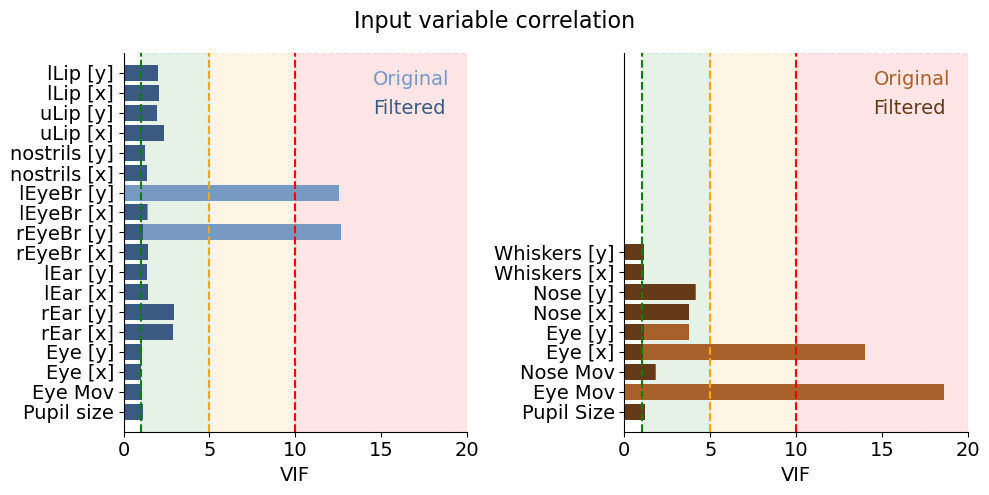

In [83]:
import pandas as pd
import statsmodels.api as sm

def calculate_vif(input_data, col_names):

    if not isinstance(input_data, pd.DataFrame):
        input_data = pd.DataFrame(input_data)
    
    vif_data = pd.DataFrame()
    vif_data["feature"] = col_names
    
    # Calculate VIF for each feature
    vif_data["VIF"] = [1 / (1 - sm.OLS(input_data[col].values, 
                                       sm.add_constant(input_data.loc[:, input_data.columns != col].values)).fit().rsquared) for col in input_data.columns]

    return vif_data

varNames_macaque = np.array(['Pupil size', 'Eye Mov', 'Eye [x]', 'Eye [y]', 'rEar [x]', 'rEar [y]', 'lEar [x]', 'lEar [y]', 
            'rEyeBr [x]', 'rEyeBr [y]', 'lEyeBr [x]', 'lEyeBr [y]', 'nostrils [x]', 'nostrils [y]', 
            'uLip [x]', 'uLip [y]', 'lLip [x]', 'lLip [y]'])
varNames_mouse = np.array(['Pupil Size', 'Eye Mov', 'Nose Mov', 'Eye [x]', 'Eye [y]', 'Nose [x]', 'Nose [y]', 'Whiskers [x]', 'Whiskers [y]'])

dats_train_mouse = np.load('Predictors_emissions_mouse_concat_train_20pad.npz', allow_pickle = True)
dat_mouse = dats_train_mouse['predictors']
y_train_mouse = dats_train_mouse['emissions']
dats_train_macaque = np.load('Predictors_emissions_macaque_concat_train_10pad.npz', allow_pickle = True)
dat_macaque = dats_train_macaque['predictors']
y_train_macaque = dats_train_macaque['emissions']


vif_mouse = calculate_vif(dat_mouse, varNames_mouse)
vif_mouse_filtered = calculate_vif(dat_mouse[:,varNames_mouse!='Eye Mov'], varNames_mouse[varNames_mouse!='Eye Mov'])
vif_macaque = calculate_vif(dat_macaque, varNames_macaque)
vif_macaque_filtered = calculate_vif(dat_macaque[:,varNames_macaque!='lEyeBr [y]'], varNames_macaque[varNames_macaque!='lEyeBr [y]'])

# Function to align and merge VIF data
def align_and_merge_vif(vif_main, vif_filtered, features_main):
    vif_all = pd.DataFrame({'feature': features_main, 'VIF_main': np.nan, 'VIF_filtered': np.nan})
    vif_all = vif_all.set_index('feature')
    vif_all.loc[vif_main['feature'], 'VIF_main'] = vif_main['VIF'].values
    vif_all.loc[vif_filtered['feature'], 'VIF_filtered'] = vif_filtered['VIF'].values

    return vif_all.reset_index()

# Align and merge VIF data
vif_mouse_all = align_and_merge_vif(vif_mouse, vif_mouse_filtered, varNames_mouse)
vif_macaque_all = align_and_merge_vif(vif_macaque, vif_macaque_filtered, varNames_macaque)

# Plotting
fig, ax = plt.subplots(ncols=2, figsize=(10, 5))
colors = ['#7899c2ff', '#A8612A']
cus_pal = sns.color_palette(['#7899c2ff', '#A8612A'])

# Mouse
ax[0].barh(vif_macaque_all['feature'], vif_macaque_all['VIF_main'], color=colors[0], label='Original')
ax[0].barh(vif_macaque_all['feature'], vif_macaque_all['VIF_filtered'], color=darken_color(colors[0],0.6), label='Filtered')

# Macaque
ax[1].barh(vif_mouse_all['feature'], vif_mouse_all['VIF_main'], color=colors[1], label='Original')
ax[1].barh(vif_mouse_all['feature'], vif_mouse_all['VIF_filtered'], color=darken_color(colors[1],0.6), label='Filtered')
ax[1].set_ylim(-1, len(vif_macaque_all['feature']))
ax[0].set_ylim(-1, len(vif_macaque_all['feature']))
# Shared formatting
for axi in ax:
    axi.axvline(1, ls='--', color='green')
    axi.axvspan(xmin = 1, xmax = 5, ls='--', color='green', alpha = 0.1, zorder = -1)
    axi.axvspan(xmin = 5, xmax = 10, ls='--', color='orange', alpha = 0.1, zorder = -1)
    axi.axvspan(xmin = 10, xmax = 20, ls='--', color='red', alpha = 0.1, zorder = -1)
    axi.axvline(5, ls='--', color='orange')
    axi.axvline(10, ls='--', color='red')
    axi.set_xlabel('VIF', fontsize=14)
    axi.set_xlim(0, 20)
    axi.legend(frameon = False, handlelength = 0, labelcolor = 'linecolor', fontsize = 14)
    axi.set_xticks(np.linspace(0, 20, 5), np.linspace(0, 20, 5).astype(int), fontsize = 14)
    axi.set_yticks(axi.get_yticks(), axi.get_yticklabels(), fontsize = 14)
sns.despine()
plt.suptitle('Input variable correlation', fontsize = 16)
plt.tight_layout()
plt.savefig('BothSpecies_VariableCorrelation_23112023.pdf', transparent = True)

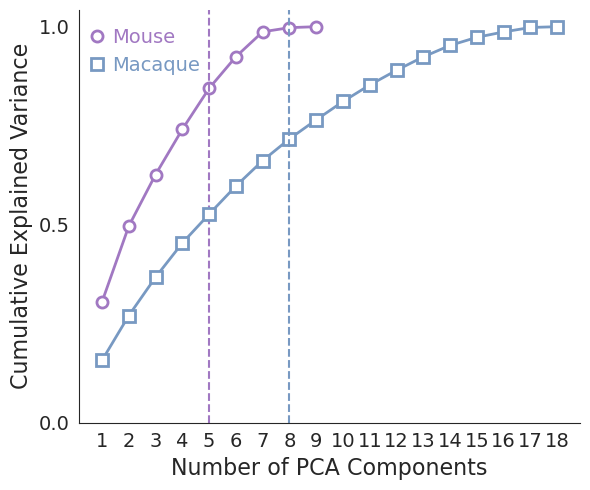

In [303]:
from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt

def supervised_pca(X, y, col, lab, marker):
    # Fit Ridge regression to get feature importances
    clf = Ridge(alpha=0.05, random_state=0)
    clf.fit(X, y.ravel())
    feature_importances = np.abs(clf.coef_[0])

    # Weight the standardized features by their importances
    X_weighted = X * feature_importances

    # Apply PCA to the weighted features
    pca = PCA()
    X_pca = pca.fit_transform(X_weighted)

    # Calculate the variance explained by each component
    pca_variance = pca.explained_variance_ratio_

    plt.plot(np.arange(1, pca_variance.shape[0]+1), np.cumsum(pca_variance), '-', marker = marker, color = col, label = lab, mfc = 'white', lw = 2, mew = 2, ms = 8)
    plt.xlabel('Number of PCA Components', fontsize = 16)
    plt.xticks(np.arange(1, pca_variance.shape[0]+1),np.arange(1, pca_variance.shape[0]+1), fontsize = 14)
    plt.yticks(np.linspace(0, 1, 3),np.linspace(0, 1, 3), fontsize = 14)
    plt.ylabel('Cumulative Explained Variance', fontsize = 16)

    elbow = find_elbow_point(np.arange(1, pca_variance.shape[0]+1), np.cumsum(pca_variance))
    plt.axvline(elbow, color = col, ls = '--')

    pca_fin = PCA(n_components = elbow)
    _ = pca_fin.fit_transform(X_weighted)

    return pca_fin


def find_elbow_point(x, y):
    from kneed import KneeLocator

    # Create the KneeLocator object
    kneedle = KneeLocator(x, y, curve='concave', direction='increasing')

    # Find the elbow point
    elbow_point = kneedle.elbow

    return elbow_point

fig, ax = plt.subplots(figsize = (6, 5))
colors = ['#7899c2ff', '#A8612A']
cpca_mouse = supervised_pca(dat_train_mouse, y_train_mouse, colors[1], 'Mouse', 'o')
cpca_macaque = supervised_pca(dat_train_macaque, y_train_macaque, colors[0], 'Macaque', 's')

plt.legend(frameon = False, labelcolor = 'linecolor', handlelength = 0, fontsize = 14)
plt.tight_layout()
sns.despine()
#plt.savefig('cPCA_Both_VarExp.pdf', transparent = True)

In [362]:
def plot_tsne(dat_train, y_train, ax, cols):
    from sklearn.manifold import TSNE
    # Perform t-SNE
    tsne_results = TSNE(n_components=2, random_state=42, init = 'pca', learning_rate = 'auto').fit_transform(dat_train)
    
    # Scatter plot for t-SNE
    state_colors = [cols[state] for state in y_train]
    ax.scatter(tsne_results[:, 0], tsne_results[:, 1], c=state_colors, s=20, edgecolors = 'black', linewidths = 0.5)
    ax.set_xlabel('t-SNE Feature 1')
    ax.set_ylabel('t-SNE Feature 2')
    plt.tight_layout()

    return tsne_results

In [ ]:
from sklearn.metrics import r2_score

numTrials = 100
date = '11122023'
date_mouse = '27022024'

files_results_macaque_decorr = natsorted(glob.glob('Results/Macaque/Results_Test_sLDS_Optuna_macaque_100trials_'+date+'_RT_noLEyeBrModel_AllSubjects_session*.npz', recursive = True))
files_paramImpor_macaque = natsorted(glob.glob('Results/Macaque/*ParamImportance*'+str(numTrials)+'trials_'+date+'_RT_MorePredictors_AllSubjects_session*.npz', recursive = True))

files_results_mouse_decorr = natsorted(glob.glob('Results/Mouse/Results_Test_MSLR_Optuna_mouse_newDLC_100trials_'+date_mouse+'_RT_AllSubjects_session*.npz', recursive = True))
with open('RawData/Macaque/files_logs_macaque_moreSes.txt') as f:
    files_logs_macaque = [line.strip() for line in f.readlines()]
    
with open('RawData/Mouse/files_logs_mouse_moreSes.txt') as f:
    files_logs_mouse = [line.strip() for line in f.readlines()]

subjects_macaque = ['Cosmos', 'Karl']
stickiness_macaque, concentration_macaque, predictions_macaque, X_test_macaque, y_test_macaque, numStates_macaque, predicted_states_macaque, predicted_statesProbs_macaque, transitionMatrices_macaque, weights_macaque, errorTrials_macaque = [], [], [], [], [], [], [], [], [], [], []
cv_scores_macaque = []
for file in files_results_macaque_decorr:
    a = np.load(file, allow_pickle = True)

    X_test_macaque.append(a[a.files[0]][()]['X_test'])
    y_test_macaque.append(a[a.files[0]][()]['y_test'])
    predictions_macaque.append(a[a.files[0]][()]['predictions'])
    numStates_macaque.append(a[a.files[0]][()]['numStates'])
    concentration_macaque.append(a[a.files[0]][()]['concentration'])
    stickiness_macaque.append(a[a.files[0]][()]['stickiness'])
    predicted_states_macaque.append(a[a.files[0]][()]['predicted_states'])
    predicted_statesProbs_macaque.append(a[a.files[0]][()]['predicted_statesProbs'])
    transitionMatrices_macaque.append(a[a.files[0]][()]['transitionMatrices'])
    weights_macaque.append(a[a.files[0]][()]['weights'])

numShuff = 100
perf_macaque = np.full(len(y_test_macaque), np.nan)
perf_macaque_Sh = np.full((len(y_test_macaque), numShuff), np.nan)

for i in range(len(y_test_macaque)):
    preds = np.array(predictions_macaque[i])
    preds[preds<0] = 0
    perf_macaque[i] = r2_score(y_test_macaque[i], preds)#, squared = False)
    for s in np.arange(numShuff):
        perf_macaque_Sh[i,s] = r2_score(y_test_macaque[i], np.random.permutation(y_test_macaque[i]))#, squared = False)


with open('RawData/Mouse/files_logs_mouse_moreSes.txt') as f:
    files_logs_mouse = [line.strip() for line in f.readlines()]
    
subjects_mouse = ['001', '003', '004', '005', '012', '013']
stickiness_mouse, concentration_mouse, predictions_mouse, X_test_mouse, y_test_mouse, numStates_mouse, predicted_states_mouse, predicted_statesProbs_mouse, transitionMatrices_mouse, weights_mouse, errorTrials_mouse = [], [], [], [], [], [], [], [], [], [], []
cv_scores_mouse = []
for file in files_results_mouse_decorr:
    a = np.load(file, allow_pickle = True)

    X_test_mouse.append(a[a.files[0]][()]['X_test'])
    y_test_mouse.append(a[a.files[0]][()]['y_test'])
    predictions_mouse.append(a[a.files[0]][()]['predictions'])
    numStates_mouse.append(a[a.files[0]][()]['numStates'])
    concentration_mouse.append(a[a.files[0]][()]['concentration'])
    stickiness_mouse.append(a[a.files[0]][()]['stickiness'])
    predicted_states_mouse.append(a[a.files[0]][()]['predicted_states'])
    predicted_statesProbs_mouse.append(a[a.files[0]][()]['predicted_statesProbs'])
    transitionMatrices_mouse.append(a[a.files[0]][()]['transitionMatrices'])
    weights_mouse.append(a[a.files[0]][()]['weights'])

numShuff = 100
perf_mouse = np.full(len(y_test_mouse), np.nan)
perf_mouse_Sh = np.full((len(y_test_mouse), numShuff), np.nan)

for i in range(len(y_test_mouse)):
    preds = np.array(predictions_mouse[i])
    preds[preds<0] = 0
    perf_mouse[i] = r2_score(y_test_mouse[i], preds)#, squared = False)
    for s in np.arange(numShuff):
        perf_mouse_Sh[i,s] = r2_score(y_test_mouse[i], np.random.permutation(y_test_mouse[i]))#, squared = False)

/gs/home/tlaieboriaa/.conda/envs/Cluster-GLMHMM3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
/gs/home/tlaieboriaa/.conda/envs/Cluster-GLMHMM3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


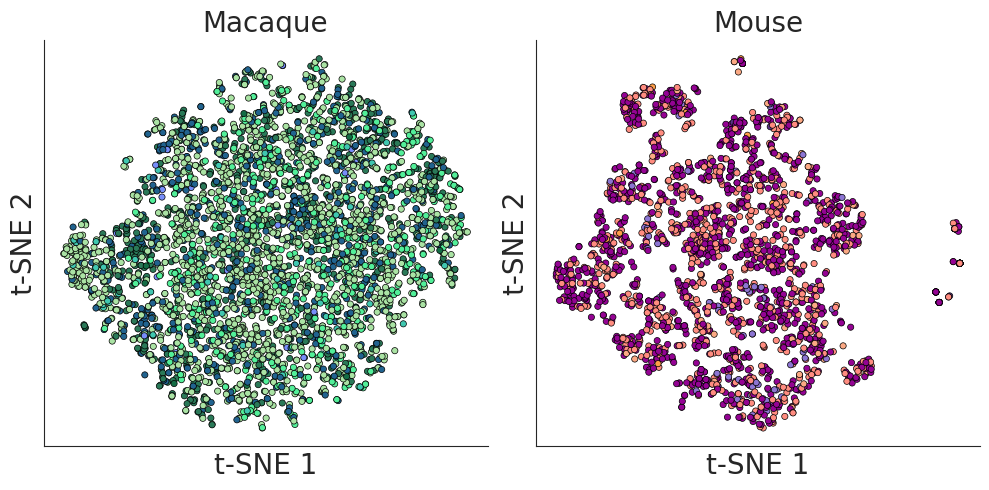

In [365]:
fig, ax = plt.subplots(ncols = 2, figsize = (11, 5))
tsne_results_macaque = plot_tsne(np.concatenate(X_test_macaque), np.concatenate(predicted_states_macaque), ax = ax[0], cols = cols_macaque)
tsne_results_mouse = plot_tsne(np.concatenate(X_test_mouse), np.concatenate(predicted_states_mouse), ax = ax[1], cols = cols_mouse)

sns.despine()
for axi in ax:
    axi.set_xticks([])
    axi.set_yticks([])
    axi.set_ylabel('t-SNE 2', fontsize = 20)
    axi.set_xlabel('t-SNE 1', fontsize = 20)

ax[0].set_title('Macaque', fontsize = 20)
ax[1].set_title('Mouse', fontsize = 20)
plt.tight_layout()
plt.savefig('tSNE_Both_13112023.png', dpi = 400, transparent = True)

In [77]:
import glob
from natsort import natsorted
filenames = natsorted(glob.glob('ARHMM_CVscores_macaque_*.npy', recursive=True))
scores_cv_macaque = np.zeros((len(filenames), 50))
for ii, file in enumerate(filenames):
    scores_cv_macaque[ii,:] = np.load(file)

filenames = natsorted(glob.glob('ARHMM_CVscores_mouse_*.npy', recursive=True))
scores_cv_mouse = np.zeros((len(filenames), 50))
for ii, file in enumerate(filenames):
    scores_cv_mouse[ii,:] = np.load(file)    

In [74]:
import glob
import numpy as np
from natsort import natsorted
import seaborn as sns
import matplotlib.pyplot as plt


files_results_macaque = natsorted(glob.glob('Results/Macaque/*_states_03062023_RT_AllSubjects_R2score_CVOnly.npz', recursive = True))
r2_lr_macaque =  np.load('LassoReg_macaque_03062023_RT_AllSubjects_R2score_CVOnly.npy')
cv_scores_macaque = np.zeros((len(files_results_macaque), 100))

for ii, file in enumerate(files_results_macaque):
    a = np.load(file, allow_pickle = True)
    cv_scores_macaque[ii, :] =  a[a.files[0]][()].copy()

files_results_mouse = natsorted(glob.glob('Results/Mouse/Results_CV_sLDS_Optuna_mouse_*_states_06062023_RT_AllSubjects_R2score_CVOnly.npz', recursive = True))

r2_lr_mouse =  np.load('LassoReg_mouse_03062023_RT_AllSubjects_R2score_CVOnly.npy')
cv_scores_mouse = np.zeros((len(files_results_mouse), 100))

for ii, file in enumerate(files_results_mouse):
    a = np.load(file, allow_pickle = True)
    keyss = list(a.keys())
    cv_scores_mouse[ii, :] =  a[a.files[0]][()].copy()

In [106]:
import glob
import numpy as np
from natsort import natsorted
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error as mse
from scipy.stats import mannwhitneyu as mu
import BehavUtils as butils

selected_variables_mouse = ['PupilSize', 'EyeMov', 'NoseMov', 'Eye [x]', 'Eye [y]', 'Nose [x]', 'Nose [y]', 'Whiskers [x]', 'Whiskers [y]']
varNames_smaller_macaque = np.array(['PupSize', 'EyeMov', 'Eye_x', 'Eye_y', 'NostrilMov', 'nostrils_x', 'nostrils_y', 'Lip_x', 'Lip_y'])

newOrder_mouse = np.array([0, 1, 3, 4, 2, 5, 6, 7, 8])
newOrder_macaque = np.array([0,1,2,3,8,9,10,11, 12, 13, 14, 15, 16, 17, 4,  5,  6,  7])

cols_macaque = sns.color_palette(["#52ef99", "#146c45", "#778DF9", '#40C7B0', "#aae3a4", '#2A7958', "#21638f", '#516578', "#3aa609", '#4B8AC7', '#2D4EF7'])
cols_mouse = sns.color_palette(["#5a3386", '#FF8C80', "#8c75d2", '#FBA984', "#940393", '#FE9E47', "#e9b7e3", "#cf60f3", "#ff66b2", sns.desaturate("#ff66b2", 0.5), '#FF8C80'])

#stat_labs = [np.array(['A', 'B', 'C', 'D', 'E', 'F', 'G']), np.array(['A', 'B', 'C', 'D', 'E', 'F'])]
stat_labs = [np.array(['A', 'B', 'C', 'D']), np.array(['A', 'B', 'C'])]

numTrials = 100
date = '12122023'

files_results_macaque = natsorted(glob.glob('Results/Macaque/*'+str(numTrials)+'trials_'+date+'_RT_FeatureMatching_AllSubjects_session*.npz', recursive = True))
files_results_mouse = natsorted(glob.glob('Results/Mouse/*'+str(numTrials)+'trials_'+date+'_RT_TwoAnimals_session*.npz', recursive = True))

with open('RawData/Macaque/files_logs_macaque_moreSes.txt') as f:
    files_logs_macaque = [line.strip() for line in f.readlines()]
    
with open('RawData/Mouse/files_logs_mouse_moreSes.txt') as f:
    files_logs_mouse = [line.strip() for line in f.readlines()]

subjects_macaque = ['Cosmos', 'Karl']
stickiness_macaque, concentration_macaque, predictions_macaque, X_test_macaque, y_test_macaque, numStates_macaque, predicted_states_macaque, predicted_statesProbs_macaque, transitionMatrices_macaque, weights_macaque, errorTrials_macaque = [], [], [], [], [], [], [], [], [], [], []
cv_scores_macaque = []
for file in files_results_macaque:
    a = np.load(file, allow_pickle = True)

    X_test_macaque.append(a[a.files[0]][()]['X_test'])
    y_test_macaque.append(a[a.files[0]][()]['y_test'])
    predictions_macaque.append(a[a.files[0]][()]['predictions'])
    numStates_macaque.append(a[a.files[0]][()]['numStates'])
    concentration_macaque.append(a[a.files[0]][()]['concentration'])
    stickiness_macaque.append(a[a.files[0]][()]['stickiness'])
    predicted_states_macaque.append(a[a.files[0]][()]['predicted_states'])
    predicted_statesProbs_macaque.append(a[a.files[0]][()]['predicted_statesProbs'])
    transitionMatrices_macaque.append(a[a.files[0]][()]['transitionMatrices'])
    weights_macaque.append(a[a.files[0]][()]['weights'])

numShuff = 100
perf_macaque_matched = np.full(len(y_test_macaque), np.nan)

for i in range(len(y_test_macaque)):
    preds = np.array(predictions_macaque[i])
    preds[preds<0] = 0
    perf_macaque_matched[i] = r2_score(y_test_macaque[i], preds)

with open('RawData/Mouse/files_logs_mouse_moreSes.txt') as f:
    files_logs_mouse = [line.strip() for line in f.readlines()]
    
subjects_mouse = ['001', '003', '004', '005', '012', '013']
stickiness_mouse, concentration_mouse, predictions_mouse, X_test_mouse, y_test_mouse, numStates_mouse, predicted_states_mouse, predicted_statesProbs_mouse, transitionMatrices_mouse, weights_mouse, errorTrials_mouse = [], [], [], [], [], [], [], [], [], [], []
cv_scores_mouse = []
for file in files_results_mouse:
    a = np.load(file, allow_pickle = True)

    X_test_mouse.append(a[a.files[0]][()]['X_test'])
    y_test_mouse.append(a[a.files[0]][()]['y_test'])
    predictions_mouse.append(a[a.files[0]][()]['predictions'])
    numStates_mouse.append(a[a.files[0]][()]['numStates'])
    concentration_mouse.append(a[a.files[0]][()]['concentration'])
    stickiness_mouse.append(a[a.files[0]][()]['stickiness'])
    predicted_states_mouse.append(a[a.files[0]][()]['predicted_states'])
    predicted_statesProbs_mouse.append(a[a.files[0]][()]['predicted_statesProbs'])
    transitionMatrices_mouse.append(a[a.files[0]][()]['transitionMatrices'])
    weights_mouse.append(a[a.files[0]][()]['weights'])

perf_mouse_matched = np.full(len(y_test_mouse), np.nan)

for i in range(len(y_test_mouse)):
    preds = np.array(predictions_mouse[i])
    preds[preds<0] = 0
    perf_mouse_matched[i] = r2_score(y_test_mouse[i], preds)

In [107]:
import glob
import numpy as np
from natsort import natsorted
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

selected_variables_mouse = ['PupilSize', 'EyeMov', 'NoseMov', 'Eye [x]', 'Eye [y]', 'Nose [x]', 'Nose [y]', 'Whiskers [x]', 'Whiskers [y]']
all_vars_macaque  = ['PupSize', 'EyeMov', 'Eye_x', 'Eye_y', 'rEar_x', 'rEar_y', 'lEar_x', 'lEar_y', 'rEyeBr_x', 'rEyeBr_y', 'lEyeBr_x', 
                     'lEyeBr_y', 'nostrils_x', 'nostrils_y', 'uLip_x', 'uLip_y', 'lLip_x', 'lLip_y']
newOrder_mouse = np.array([0, 1, 3, 4, 2, 5, 6, 7, 8])
newOrder_macaque = np.array([0,1,2,3,8,9,10,11, 12, 13, 14, 15, 16, 17, 4,  5,  6,  7])

cols_macaque = sns.color_palette(["#52ef99", "#146c45", "#778DF9", '#40C7B0', "#aae3a4", '#2A7958', "#21638f", '#516578', "#3aa609", '#4B8AC7', '#2D4EF7'])
cols_mouse = sns.color_palette(["#5a3386", '#FF8C80', "#8c75d2", '#FBA984', "#940393", '#FE9E47', "#e9b7e3", "#cf60f3", "#ff66b2", sns.desaturate("#ff66b2", 0.5), '#FF8C80'])

#stat_labs = [np.array(['A', 'B', 'C', 'D', 'E', 'F', 'G']), np.array(['A', 'B', 'C', 'D', 'E', 'F'])]
stat_labs = [np.array(['A', 'B', 'C', 'D']), np.array(['A', 'B', 'C'])]

date = '11122023'

files_results_macaque = natsorted(glob.glob('Results/Macaque/Results_Test_sLDS_Optuna_macaque_100trials_'+date+'_RT_noLEyeBrModel_AllSubjects_session*.npz', recursive = True))
files_results_mouse = natsorted(glob.glob('Results/Mouse/Results_Test_sLDS_Optuna_mouse_50trials_'+date+'_RT_noEyeMovModel_AllSubjects_session*.npz', recursive = True))

perf_macaque = np.full(len(files_results_macaque), np.nan)
perf_mouse = np.full(len(files_results_mouse), np.nan)

for i, file in enumerate(files_results_macaque):
    a = np.load(file, allow_pickle = True)
    preds = np.array(a[a.files[0]][()]['predictions'])
    preds[preds<0] = 0
    perf_macaque[i] = r2_score(a[a.files[0]][()]['y_test'], preds)


for i, file in enumerate(files_results_mouse):
    a = np.load(file, allow_pickle = True)
    preds = np.array(a[a.files[0]][()]['predictions'])
    preds[preds<0] = 0
    perf_mouse[i] = r2_score(a[a.files[0]][()]['y_test'], preds)


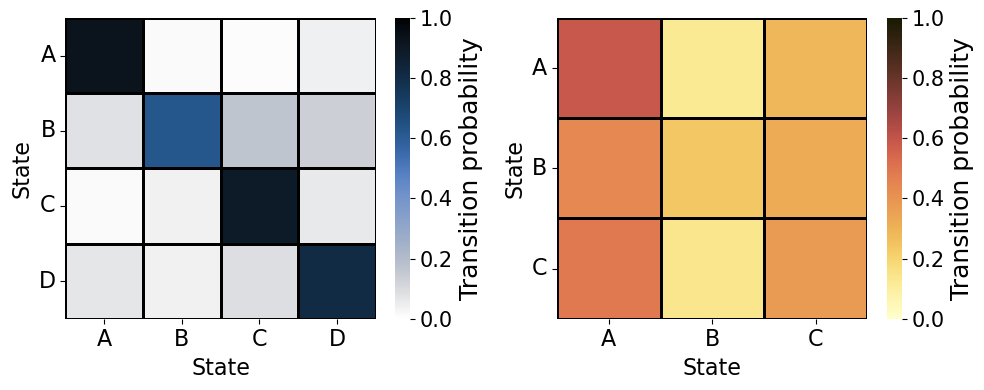

In [108]:
import cmcrameri as cmc
fig, ax = plt.subplots(ncols = 2, figsize = (10, 4))
num_states_macaque = transitionMatrices_macaque[0].shape[0]
num_states_mouse = transitionMatrices_mouse[0].shape[0]
mask = np.array(transitionMatrices_macaque[0]) < 0.1
#hm1 = sns.heatmap(transitionMatrices_macaque[0], mask = mask, vmin = 0, vmax = 1, cbar = True, ax = ax[0],
#        cmap = 'cmc.oslo_r', cbar_kws = {'label':'Transition probability'}, annot = True, fmt = '.2g', annot_kws={'fontsize':12}, linewidth = 1, linecolor = 'black')
hm1 = sns.heatmap(transitionMatrices_macaque[0], vmin = 0, vmax = 1, cbar = True, ax = ax[0],
        cmap = 'cmc.oslo_r', cbar_kws = {'label':'Transition probability'}, annot = False, fmt = '.2g', annot_kws={'fontsize':14}, linewidth = 1, linecolor = 'black')
hm1.figure.axes[-1].yaxis.label.set_size(18)
cbar = ax[0].collections[0].colorbar
# here set the labelsize b
cbar.ax.tick_params(labelsize=15)
mask = np.array(transitionMatrices_mouse[0]) < 0.1

#hm2 = sns.heatmap(transitionMatrices_mouse[0], mask = mask, vmin = 0, vmax = 1, cbar = True, ax = ax[1],
#        cmap = 'cmc.acton_r', cbar_kws = {'label':'Transition probability'}, annot = True, fmt = '.2g', annot_kws={'fontsize':12}, linewidth = 1, linecolor = 'black')
hm2 = sns.heatmap(transitionMatrices_mouse[0], vmin = 0, vmax = 1, cbar = True, ax = ax[1],
        cmap = 'cmc.lajolla', cbar_kws = {'label':'Transition probability'}, annot = False, fmt = '.2g', annot_kws={'fontsize':14}, linewidth = 1, linecolor = 'black')

hm2.figure.axes[-1].yaxis.label.set_size(18)
cbar = ax[1].collections[0].colorbar
cbar.ax.tick_params(labelsize=15)
for axi in ax:
    axi.set_ylabel('State', fontsize = 16)
    axi.set_xlabel('State', fontsize = 16)
ax[0].set_yticks(ticks = np.arange(num_states_macaque)+0.5, labels = stat_labs[0], fontsize = 16, rotation = 0)
ax[0].set_xticks(ticks = np.arange(num_states_macaque)+0.5, labels = stat_labs[0], fontsize = 16)
ax[1].set_yticks(ticks = np.arange(num_states_mouse)+0.5, labels = stat_labs[1], fontsize = 16, rotation = 0)
ax[1].set_xticks(ticks = np.arange(num_states_mouse)+0.5, labels = stat_labs[1], fontsize = 16)
plt.tight_layout()
plt.savefig('Results/BothSpecies_TransitionMatrices_MatchedModels_Test_RT_15122023.svg', transparent = True)

In [109]:
import glob
import numpy as np
from natsort import natsorted
import seaborn as sns
import matplotlib.pyplot as plt
import matplotx as mpx


files_results_macaque_full = natsorted(glob.glob('Results/Macaque/Results_CV_sLDS_Optuna_macaque_100trials_*_states_28112023_RT_noLEyeBrModel_AllSubjects_R2score_CVOnly.npz', recursive = True))
cv_scores_macaque_full = np.zeros((len(files_results_macaque_full), 100))

for ii, file in enumerate(files_results_macaque_full):
    a = np.load(file, allow_pickle = True)
    cv_scores_macaque_full[ii, :] =  a[a.files[0]][()].copy()

files_results_mouse_full = natsorted(glob.glob('Results/Mouse/Results_CV_sLDS_Optuna_mouse_100trials_*_states_28112023_RT_noEyeMovModel_AllSubjects_R2score_CVOnly.npz', recursive = True))
cv_scores_mouse_full = np.zeros((len(files_results_mouse_full), 100))
for ii, file in enumerate(files_results_mouse_full):
    a = np.load(file, allow_pickle = True)
    keyss = list(a.keys())
    cv_scores_mouse_full[ii, :] =  a[a.files[0]][()].copy()
cv_scores_mouse_full[cv_scores_mouse_full<-100] = 0


files_results_macaque_matched = natsorted(glob.glob('Results/Macaque/Results_CV_MSLR_Optuna_macaque_50trials_*_states_12122023_RT_FeatureMatching_AllSubjects_R2score_CVOnly.npz', recursive = True))
cv_scores_macaque_matched = np.zeros((len(files_results_macaque_matched), 50))
for ii, file in enumerate(files_results_macaque_matched):
    a = np.load(file, allow_pickle = True)
    cv_scores_macaque_matched[ii, :] =  a[a.files[0]][()].copy()

files_results_mouse_matched = natsorted(glob.glob('Results/Mouse/Results_CV_MSLR_Optuna_mouse_50trials_*_states_12122023_RT_TwoAnimals_R2score_CVOnly.npz', recursive = True))
cv_scores_mouse_matched = np.zeros((len(files_results_mouse_matched), 50))
for ii, file in enumerate(files_results_mouse_matched):
    a = np.load(file, allow_pickle = True)
    keyss = list(a.keys())
    cv_scores_mouse_matched[ii, :] =  a[a.files[0]][()].copy()


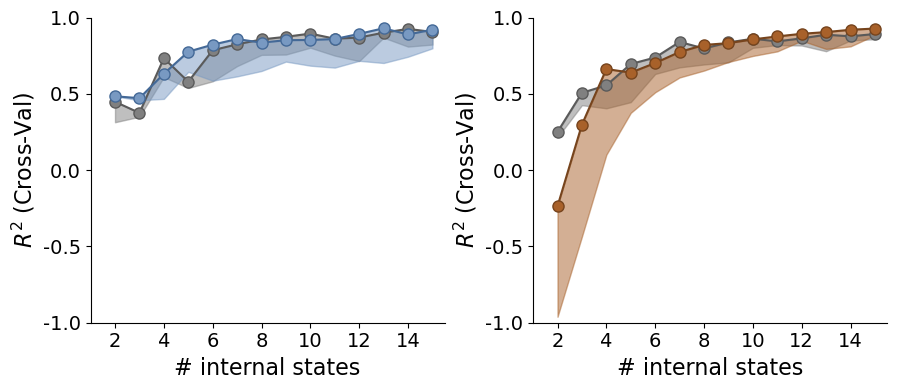

In [121]:
fig, ax = plt.subplots(ncols=2, figsize=(9, 4))
sns.despine()
colors = ['#7899c2ff', '#A8612A']
plot_cv_states(cv_scores_macaque_full, cv_scores_mouse_full, ax, colors = ['gray']*2, marker = 'o')
plot_cv_states(cv_scores_macaque_matched, cv_scores_mouse_matched, ax, colors = colors, marker = 'o')

for axi in ax:
    axi.set_ylim(-1, 1)
    axi.set_xlim(1, 15.5)
    xtiks = np.arange(2, cv_scores_macaque_full.shape[0] + 2)[::2]
    axi.set_xticks(xtiks)
    axi.set_yticks(np.linspace(-1,1,5), np.linspace(-1,1,5))
    axi.set_xticklabels(np.arange(2, cv_scores_macaque_full.shape[0] + 2)[::2], fontsize=14)
    
plt.savefig('Results/BothSpecies_MatchedModels_numStates_R2_CV_RT_15122023.svg', transparent = True)

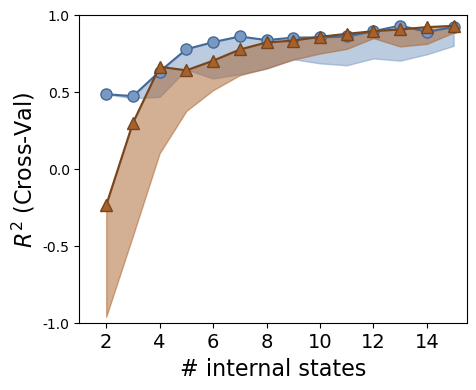

In [120]:
fig, ax = plt.subplots(figsize = (5, 4))
meds_macaque = np.nanmax(cv_scores_macaque_matched,axis = 1)
meds_mouse = np.nanmax(cv_scores_mouse_matched,axis = 1)

# Calculate standard deviations
std_low_macaque = np.nanpercentile(cv_scores_macaque_matched, 5, axis=1)
std_low_mouse = np.nanpercentile(cv_scores_mouse_matched, 5, axis=1)

meds = [meds_macaque, meds_mouse]
std_low = [std_low_macaque, std_low_mouse]
# Plot medians and stds
for ii in range(2):
    x = np.arange(meds[ii].shape[0])+2
    ax.plot(x, meds[ii], color=darken_color(colors[ii], 0.7), mfc=colors[ii], ms=8, mew=1, marker = ['o', '^'][ii])
    ax.fill_between(x, std_low[ii], meds[ii], color=colors[ii], alpha = 0.5)
ax.set_ylim([0, 1])
ax.set_ylabel('$R^2$ (Cross-Val)', fontsize=16)
ax.set_xlabel('# internal states', fontsize=16)

ax.set_ylim(-1, 1)
ax.set_xlim(1, 15.5)
xtiks = np.arange(2, cv_scores_macaque_full.shape[0] + 2)[::2]
ax.set_xticks(xtiks)
ax.set_yticks(np.linspace(-1,1,5), np.linspace(-1,1,5))
ax.set_xticklabels(np.arange(2, cv_scores_macaque_full.shape[0] + 2)[::2], fontsize=14)
plt.savefig('Results/BothSpecies_MatchedModelsOnly_numStates_R2_CV_RT_15122023.svg', transparent = True)

In [326]:
import optuna
import pandas as pd
import seaborn as sns
import warnings
import BehavUtils as butils
import glob
from natsort import natsorted
import time
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import r2_score


numTrials = 100
nSplits = 5
scores_cv = np.full(numTrials, np.nan)

dats_train = np.load('Predictors_emissions_mouse_concat_train.npz', allow_pickle = True)
dat_train_final = dats_train['predictors']
dat_train_final = dat_train_final[:,0].reshape(-1,1)
y_train_final = dats_train['emissions']
y_train_final[y_train_final>4] = 4

start2 = time.time()

btscv = butils.BlockingTimeSeriesSplit(n_splits=nSplits)

siz = int(0.8*y_train_final.shape[0])
def objective(trial):
    """Objective function to be optimized by Optuna. 
    Inputs:
        - trial (optuna.trial._trial.Trial): Optuna trial
    Returns:
        - RMSE(torch.Tensor): The test RMSE. Parameter to be minimized.
    """

    # Define range of values to be tested for the model hyperparameters.
    alpha = trial.suggest_float("alpha", 0, 100)            
    
    # Initialize a Lasso regression
    model = SGDRegressor(penalty = 'l2', alpha = alpha, learning_rate = 'optimal', max_iter=10000, tol=0.001, shuffle = False)

    # List to store the performance for each fold
    scor_list = []

    # Iterate over each split
    for train_index, test_index in btscv.split(dat_train_final):
        X_train, X_test = dat_train_final[train_index], dat_train_final[test_index]
        y_train, y_test = y_train_final[train_index], y_train_final[test_index]

        # Fit the model
        model.fit(X_train, y_train.reshape(-1,))

        # Make predictions
        y_pred = model.predict(X_test)

        # Compute RMSE and add it to the list
        scor = r2_score(y_test, y_pred)
        scor_list.append(scor)
    

    # Init tracking experiment hyper-parameters, trial id are stored.
    config = dict(trial.params)
    config["trial.number"] = trial.number

    return np.nanmean(scor_list)


if __name__ == '__main__':

    # --- Parameters ----------------------------------------------------------

    number_of_trials = 100                  # Number of Optuna trials

    # Create an Optuna study to minimize the RMSE, using CV.
    sampler = optuna.samplers.CmaEsSampler()
    study = optuna.create_study(direction = "maximize")#, sampler = sampler)
    study.optimize(objective, n_trials = number_of_trials, gc_after_trial=True)

    # Save results to csv file
    df = study.trials_dataframe().drop(['datetime_start', 'datetime_complete', 'duration'], axis=1)  # Exclude columns
    df = df.loc[df['state'] == 'COMPLETE']          # Keep only results that did not prune
    df = df.drop('state', axis=1)                   # Exclude state column
    df = df.sort_values('value')                    # Sort based on performance

    # Find the most important hyperparameters
    most_important_parameters = optuna.importance.get_param_importances(study, target=None)

    scores_cv = df['value'].values
    selected_alpha = list(study.best_trial.params.values())

/gs/home/tlaieboriaa/.conda/envs/Cluster-GLMHMM3/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2023-11-22 15:39:33,931] A new study created in memory with name: no-name-42083e23-59a6-44db-b01d-9c99fc2fa56d
[I 2023-11-22 15:39:33,941] Trial 0 finished with value: -0.5932153307350877 and parameters: {'alpha': 85.88796611813405}. Best is trial 0 with value: -0.5932153307350877.
[I 2023-11-22 15:39:34,252] Trial 1 finished with value: -0.5585942815906269 and parameters: {'alpha': 28.6227488186506}. Best is trial 1 with value: -0.5585942815906269.
[I 2023-11-22 15:39:34,551] Trial 2 finished with value: -0.5940584434682801 and parameters: {'alpha': 84.65754571639181}. Best is trial 1 with value: -0.5585942815906269.
[I 2023-11-22 15:39:34,845] Trial 3 finished with value: -0.6053282212508313 and paramete

In [327]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import r2_score

dat = np.load('Predictors_emissions_macaque_concat_train.npz', allow_pickle = True)
dat_train_final_macaque = dat['predictors']
dat_train_final_macaque = dat_train_final_macaque[:,0].reshape(-1,1)
y_train_final_macaque = dat['emissions']

siz = int(0.8*y_train_final_macaque.shape[0])
def objective(trial):
    """Objective function to be optimized by Optuna. 
    Inputs:
        - trial (optuna.trial._trial.Trial): Optuna trial
    Returns:
        - RMSE(torch.Tensor): The test RMSE. Parameter to be minimized.
    """

    # Define range of values to be tested for the model hyperparameters.
    alpha = trial.suggest_float("alpha", 0, 100)            
    
    # Initialize an ElasticNet model
    #model = ElasticNet(alpha = alpha, l1_ratio = l1_ratio, precompute=False, max_iter=10000, tol=0.0001)
    model = SGDRegressor(penalty = 'l2', alpha = alpha, learning_rate = 'optimal', max_iter=10000, tol=0.001, shuffle = False)

    # List to store the performance for each fold
    scor_list = []

    # Iterate over each split
    for train_index, test_index in btscv.split(dat_train_final_macaque):
        X_train, X_test = dat_train_final_macaque[train_index], dat_train_final_macaque[test_index]
        y_train, y_test = y_train_final_macaque[train_index], y_train_final_macaque[test_index]

        # Fit the model
        model.fit(X_train, y_train.reshape(-1,))

        # Make predictions
        y_pred = model.predict(X_test)

        # Compute RMSE and add it to the list
        scor = r2_score(y_test, y_pred)
        scor_list.append(scor)
    

    # Init tracking experiment hyper-parameters, trial id are stored.
    config = dict(trial.params)
    config["trial.number"] = trial.number

    return np.nanmean(scor_list)


if __name__ == '__main__':

    # --- Parameters ----------------------------------------------------------

    number_of_trials = 100                  # Number of Optuna trials

    # Create an Optuna study to minimize the RMSE, using CV.
    sampler = optuna.samplers.CmaEsSampler()
    study = optuna.create_study(direction = "maximize")#, sampler = sampler)
    study.optimize(objective, n_trials = number_of_trials, gc_after_trial=True)

    # Save results to csv file
    df = study.trials_dataframe().drop(['datetime_start', 'datetime_complete', 'duration'], axis=1)  # Exclude columns
    df = df.loc[df['state'] == 'COMPLETE']          # Keep only results that did not prune
    df = df.drop('state', axis=1)                   # Exclude state column
    df = df.sort_values('value')                    # Sort based on performance

    # Find the most important hyperparameters
    most_important_parameters = optuna.importance.get_param_importances(study, target=None)

    scores_cv_macaque = df['value'].values
    selected_alpha = list(study.best_trial.params.values())

[I 2023-11-22 15:40:12,954] A new study created in memory with name: no-name-54d897c0-fcfa-41fa-a0d2-1c8a5f638343
[I 2023-11-22 15:40:12,966] Trial 0 finished with value: -1.3267689596465362 and parameters: {'alpha': 35.26563475449872}. Best is trial 0 with value: -1.3267689596465362.
[I 2023-11-22 15:40:13,388] Trial 1 finished with value: -1.498842785083197 and parameters: {'alpha': 43.34333376248723}. Best is trial 0 with value: -1.3267689596465362.
[I 2023-11-22 15:40:13,778] Trial 2 finished with value: -1.9429603714122732 and parameters: {'alpha': 79.40794651052376}. Best is trial 0 with value: -1.3267689596465362.
[I 2023-11-22 15:40:14,165] Trial 3 finished with value: -1.9526129097054299 and parameters: {'alpha': 80.64336719561648}. Best is trial 0 with value: -1.3267689596465362.
[I 2023-11-22 15:40:14,580] Trial 4 finished with value: -1.7836947576579578 and parameters: {'alpha': 62.49966396570564}. Best is trial 0 with value: -1.3267689596465362.
[I 2023-11-22 15:40:14,954]

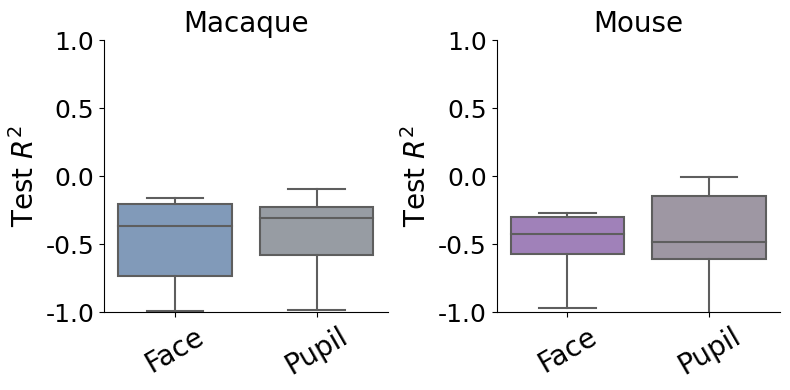

In [358]:
r2_lr_macaque =  np.load('LassoReg_macaque_03062023_RT_AllSubjects_R2score_CVOnly.npy')
r2_lr_mouse =  np.load('LassoReg_mouse_03062023_RT_AllSubjects_R2score_CVOnly.npy')

animals_colors = ['#7899c2ff', '#A8612A']

pal_mac = sns.color_palette([animals_colors[0], sns.desaturate(animals_colors[0], 0.2)])
pal_mous = sns.color_palette([animals_colors[1], sns.desaturate(animals_colors[1], 0.2)])
fig, ax = plt.subplots(ncols = 2, figsize=(8,4))
sns.despine()
# Matplotlib boxplot with position control
sns.boxplot(data = [r2_lr_macaque, scores_cv_macaque], palette = pal_mac, showfliers = False, ax = ax[0])
sns.boxplot(data = [r2_lr_mouse, scores_cv], palette = pal_mous, showfliers = False, ax = ax[1])

titls = ['Macaque', 'Mouse']
for ii, axi in enumerate(ax):
    axi.set_xticks(ticks = np.arange(2), labels = ['Face', 'Pupil'], fontsize = 20, rotation = 30)
    axi.set_yticks(ticks = np.linspace(-1., 1, 5), labels = ['{:.1f}'.format(a) for a in np.linspace(-1., 1, 5)], fontsize = 18)
    axi.set_ylabel('Test $R^2$', fontsize = 20)
    axi.set_ylim(-1,1)
    axi.set_title(titls[ii], fontsize = 20)
plt.tight_layout()
plt.savefig('Results/BothSpecies_AllSubjects_R2_Test_RT_FacesVsPupil_noSwitching_22112023.svg', transparent = True)